# Final Project E-commerce
### Part 1
by: ***Dorothy Kunth***

## Table of Contents

- [Project Overview](#overview)
- [Data Preprocessing](#DPP)
- [Exploratory Data Analysis](#EDA)
    - [Analysis on Returned Items](#returns)

<a id='overview'></a>
## Project Overview
The dataset that will be used in this E-commerce Product Range Analysis is a sales transactions history of an online store that sells household goods. For e-commerce companies, performing analyses such as product range analysis, customer RFM and sales analysis play a very important role in order to ensure continued success of the business. 


### Project Goals
- 1. Identify the top performing products and product ranges or categories<br>
- 2. Identify the top performing customers


### Datasets and Attributes

The dataset contains ***541909*** transaction records from ***2018-11-29 to 2019-12-07***. It has 7 attributes:

**InvoiceNo**: Invoice reference number uniquely assigned for each transaction. If the InvoiceNo starts with 'C', it indicates a cancellation<br><br>
**StockCode**: Product or item code uniquely assigned to each distinct product<br><br>
**Description**: Product or item name<br><br>
**Quantity**: The quantities for each product or item per transaction<br><br>
**InvoiceDate**: Invoice date and time, the day and time the transaction was generated by the system<br><br>
**UnitPrice**: Product price per unit<br><br>
**CustomerID**: Customer reference number uniquely assigned to each customer<br><br>


### Project Scope
- 1. Data Preprocessing (Part 1)<br> 
- 2. Exploratory Data Analysis (Part 1)<br> 
- 3. Customer Segmentation using RFM (Part 2)<br>
- 4. Product Analysis (Part 2)
     - Product Segmentation  using RFM
     - Prudct Category Identification
     - Product Category Analysis<br>
- 5. Statistical Hypotheses (Part 2)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

<a id='EDA'></a>
## Exploratory Data Analysis
**Business Questions:**
- 1. What are the top performing products based on total sales?
- 2. What are the top performing products based on quantity sold?
- 3. Who are the top performing customers based on total sales?
- 4. Who are the top performing customers based on quantity purchased?
- 5. How do the sales figures look like for each period? Which month has the biggest sales?
- 6. How do the sales figures look like per day of the week throughout the transactions timeframe?
- 7. Is there a relationship between UnitPrice, Quantity and TotalSales?

In [191]:
# reload and read the data
ecom_df = pd.read_csv('ecom_final.csv', parse_dates=['InvoiceDate'])
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29,2.55,17850.0,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29,2.75,17850.0,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11


In [192]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532328 entries, 0 to 532327
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           532328 non-null  object        
 1   StockCode           532328 non-null  object        
 2   Description         532328 non-null  object        
 3   Quantity            532328 non-null  int64         
 4   InvoiceDate         532328 non-null  datetime64[ns]
 5   UnitPrice           532328 non-null  float64       
 6   CustomerID          400742 non-null  float64       
 7   TotalSales          532328 non-null  float64       
 8   TransactionMonth    532328 non-null  int64         
 9   TransactionDay      532328 non-null  int64         
 10  TransactionWeekday  532328 non-null  object        
 11  TransactionHour     532328 non-null  int64         
 12  TransactionPeriod   532328 non-null  object        
dtypes: datetime64[ns](1), float64

In [193]:
# change datatype of CustomerID from float to object
ecom_df['CustomerID'] = ecom_df['CustomerID'].fillna(0).astype('int64').astype('str')
ecom_df['CustomerID'].replace('0', np.nan, inplace = True)

In [194]:
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29,2.55,17850,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29,2.75,17850,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11


### **1. What are the top performing products based on total sales?**

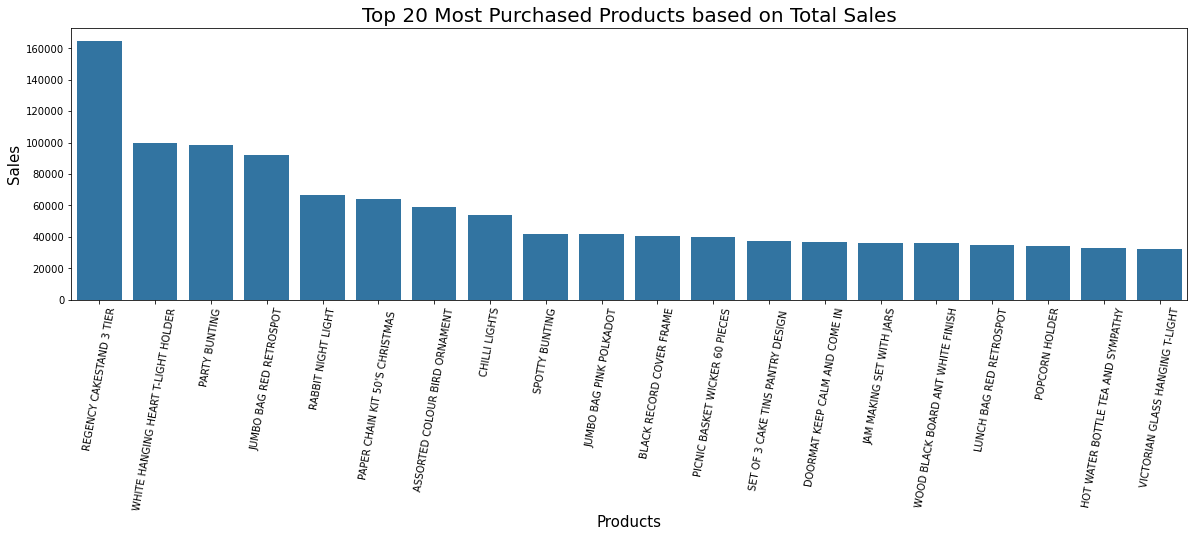

In [195]:
# Top 20 most purchased products based on total sales
top20_products = ecom_df.groupby(['Description'])['TotalSales'].agg('sum').sort_values(ascending=False)[:20]

plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

sb.barplot(x = top20_products.index, y = top20_products.values, color=base_color)
plt.xticks(rotation=80)
plt.title("Top 20 Most Purchased Products based on Total Sales", size=20)
plt.xlabel("Products", size=15)
plt.ylabel("Sales", size=15)
plt.show();

> **Based on our data, the top performing product in terms of sales amount is:**
> - 1. REGENCY CAKESTAND 3 TIER. 
>
> **The next 3 are:**
> - 2. WHITE HANGING HEART T-LIGHT HOLDER
> - 3. PARTY BUNTING
> - 4. JUMBO BAG RED RETROSPOT

### **2. What are the top performing products based on quantity sold?**

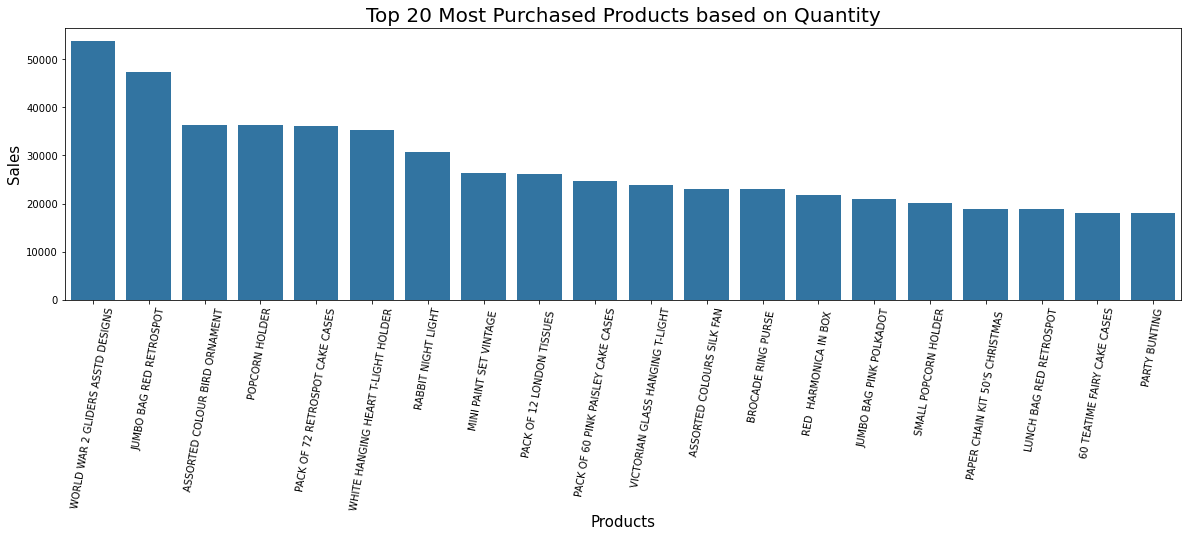

In [196]:
# Top 20 most purchased products based on quantity
top20_prod_qty = ecom_df.groupby(['Description'])['Quantity'].agg('sum').sort_values(ascending=False)[:20]

plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

sb.barplot(x = top20_prod_qty.index, y = top20_prod_qty.values, color=base_color)
plt.xticks(rotation=80)
plt.title("Top 20 Most Purchased Products based on Quantity", size=20)
plt.xlabel("Products", size=15)
plt.ylabel("Sales", size=15)
plt.show();

> **Based on quantity sold, the top 2 performing products are:**
> - 1. WORLD WAR 2 GLIDERS ASSTD DESIGNS
> - 2. JUMBO BAG RED RETROSPOT. 
>
> **Then the next 4 are:**
> - 3. ASSORTED COLOUR BIRD ORNAMENT
> - 4. POPCORN HOLDER
> - 5. PACK OF 72 RETROSPOT CAKE CASES
> - 6. WHITE HANGING HEART T-LIGHT HOLDER 
>


> **WHITE HANGING HEART T-LIGHT HOLDER and JUMBO BAG RED RETROSPOT are both top performers in terms of total sales and quantity.**

### **3. Who are the top performing customers based on total sales?**

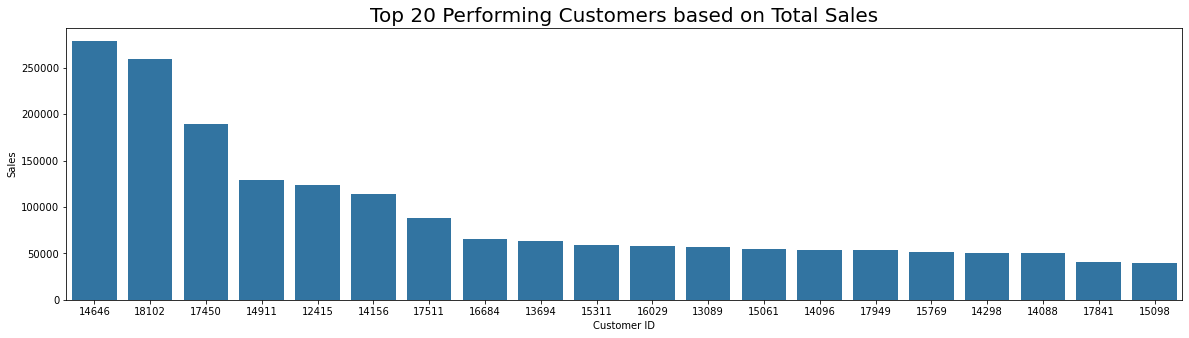

In [197]:
# Top 20 performing customers based on total sales
top20_cust_sales = ecom_df.groupby(['CustomerID'])['TotalSales'].agg('sum').sort_values(ascending=False)[:20]

plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

sb.barplot(x = top20_cust_sales.index, y = top20_cust_sales.values, color=base_color)
plt.title("Top 20 Performing Customers based on Total Sales", size=20)
plt.xlabel("Customer ID", size=10)
plt.ylabel("Sales", size=10)
plt.show();

> **Based on total sales, the top 5 customers are:**
> - 1. 14646 
> - 2. 18102
> - 3. 17450
> - 4. 14911
> - 5. 12415

### **4. Who are the top performing customers based on quantity purchased?**

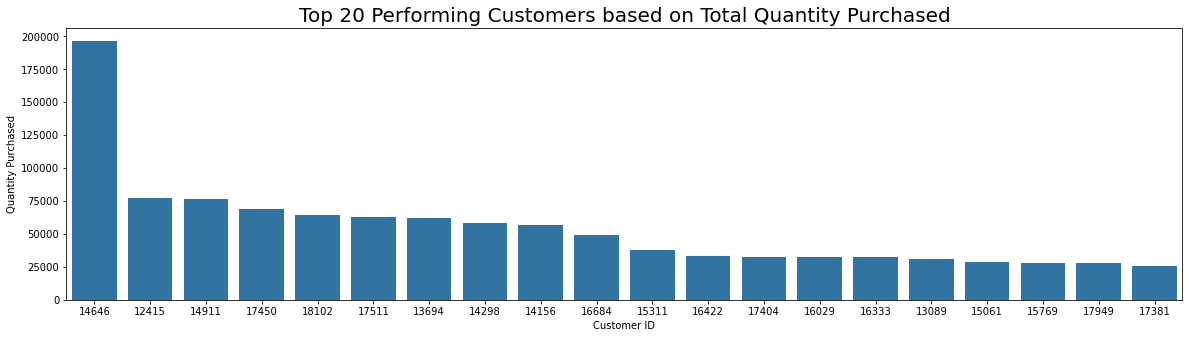

In [198]:
# Top 20 performing customers based on quantity purchased
top20_cust_qty = ecom_df.groupby(['CustomerID'])['Quantity'].agg('sum').sort_values(ascending=False)[:20]

plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

sb.barplot(x = top20_cust_qty.index, y = top20_cust_qty.values, color=base_color)
plt.title("Top 20 Performing Customers based on Total Quantity Purchased", size=20)
plt.xlabel("Customer ID", size=10)
plt.ylabel("Quantity Purchased", size=10)
plt.show();

> **Based on total quantity purchased, the top 5 customers are:
>
> - 1. 14646
> - 2. 12415
> - 3. 14911
> - 4. 17450
> - 5. 18102

> **The top 5 customers based on total sales are the same top 5 customers based on quantity purchased. Customer ID 14646 is the on the top spot for both.**

### 5. How do the sales figures look like for each period? Which month has the biggest sales?

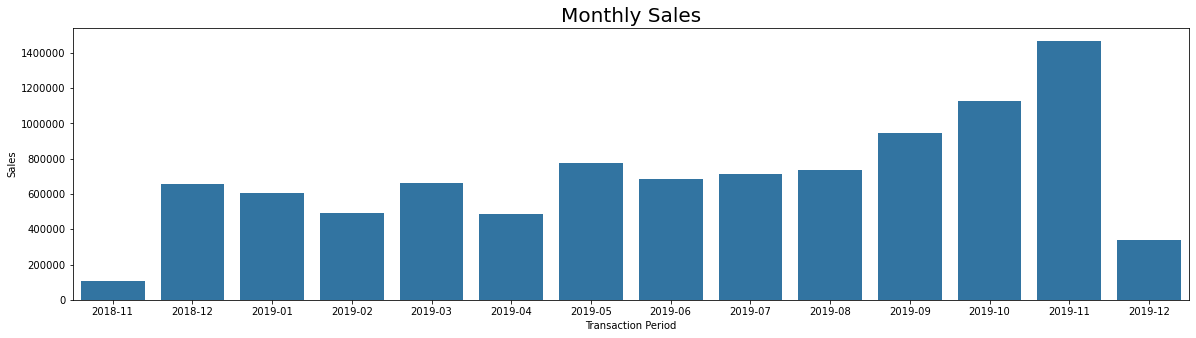

In [199]:
# Total Sales per Month
monthly_sales = ecom_df.groupby(['TransactionPeriod'])['TotalSales'].agg('sum')

plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

g = sb.barplot(x = monthly_sales.index, y = monthly_sales.values, color=base_color)
plt.title("Monthly Sales", size=20)
plt.xlabel("Transaction Period", size=10)
plt.ylabel("Sales", size=10)
yticks = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
g.set_yticklabels(yticks)
plt.show();

> **Our dataset coverage is from 2018-11-29 to 2019-12-07. It is expected not to have high sales figures for 11-2018 and 12-2019 periods since these cover only a few days and not full month. Surprisingly, the sales figures for the period of 12-2018 is relatively low as compared to sales figures in 09-2019, 10-2019 and 11-2019. 11-2019 is the best month.**

### **6. How do the sales figures look like per day of the week throughout the transactions timeframe?**

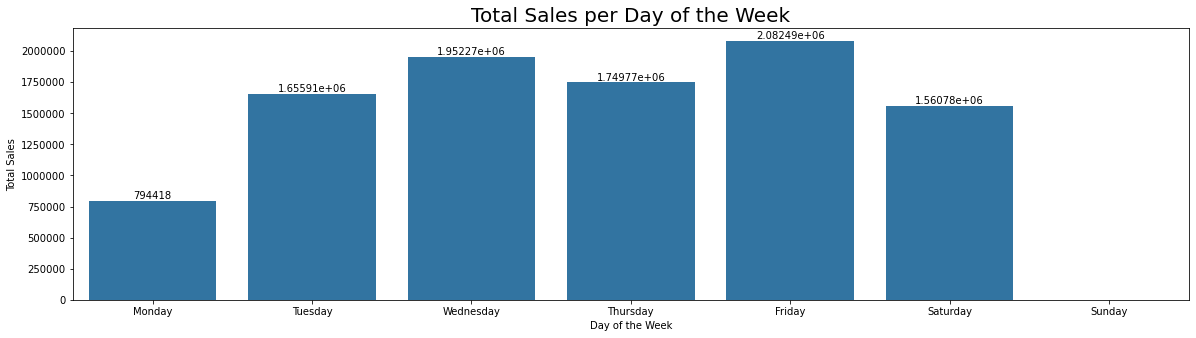

In [200]:
# Total Sales per day of the week
weekday_sales = ecom_df.groupby(['TransactionWeekday'])['TotalSales'].agg('sum')

plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
cat_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sb.barplot(x = weekday_sales.index, y = weekday_sales.values, color=base_color, order = cat_order)
plt.title("Total Sales per Day of the Week", size=20)
plt.xlabel("Day of the Week", size=10)
plt.ylabel("Total Sales", size=10)
yticks = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000]
g.set_yticklabels(yticks)
g.bar_label(g.containers[0])
plt.show();

> **It appears that most people purchase during Fridays and Wednesdays but never on a Sunday.**

### **7. Is there a relationship between UnitPrice, Quantity and TotalSales?**

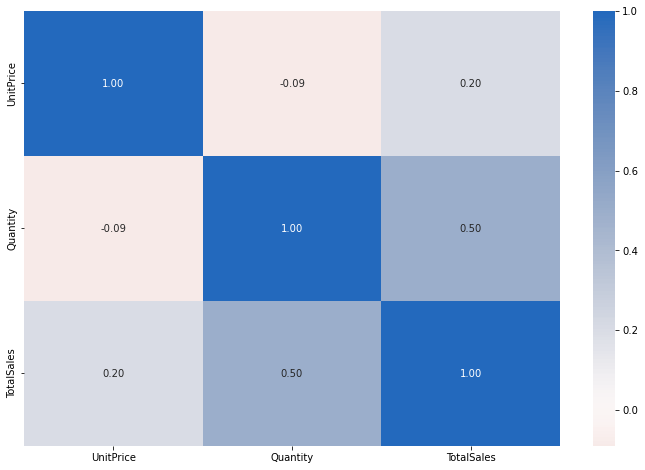

In [201]:
# correlation plot between UnitPrice, Quantity and TotalSales
plt.figure(figsize = [12, 8])
sb.heatmap(ecom_df[['UnitPrice', 'Quantity', 'TotalSales']].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

> **There is a weak positive relationship between UnitPrice and TotalSales. It just means that high-priced product don't necessarily result to high sales amount.**<br>
>
> **There is also a quite good relationship between Quantity and TotalSales. It suggests that larger quantities purchased can result to higher sales.**<br>
>
> **There is a week negative relationship between UnitPrice and Quantity. It's like high-priced products are purchased less than the low-priced products.**

In [202]:
# daily orders, number of customers and sales
dailymetrics = ecom_df.groupby(['InvoiceDate']).agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'TotalSales': 'sum'})

dailymetrics.rename(columns = {
    'InvoiceNo': 'DailyOrders',
    'CustomerID': 'NumCustomers',
    'TotalSales': 'DailySales'}, inplace=True)
dailymetrics.reset_index()

,InvoiceDate,DailyOrders,NumCustomers,DailySales
0,2018-11-29,132,97,57258.25
1,2018-11-30,161,114,47248.21
2,2018-12-01,75,55,43210.63
3,2018-12-03,92,76,30729.18
4,2018-12-04,114,89,51036.61
5,2018-12-05,88,69,81139.97
6,2018-12-06,138,112,42987.33
7,2018-12-07,137,120,49060.45
8,2018-12-08,78,54,55167.94
9,2018-12-10,47,41,17255.92


Text(0, 0.5, 'Orders')

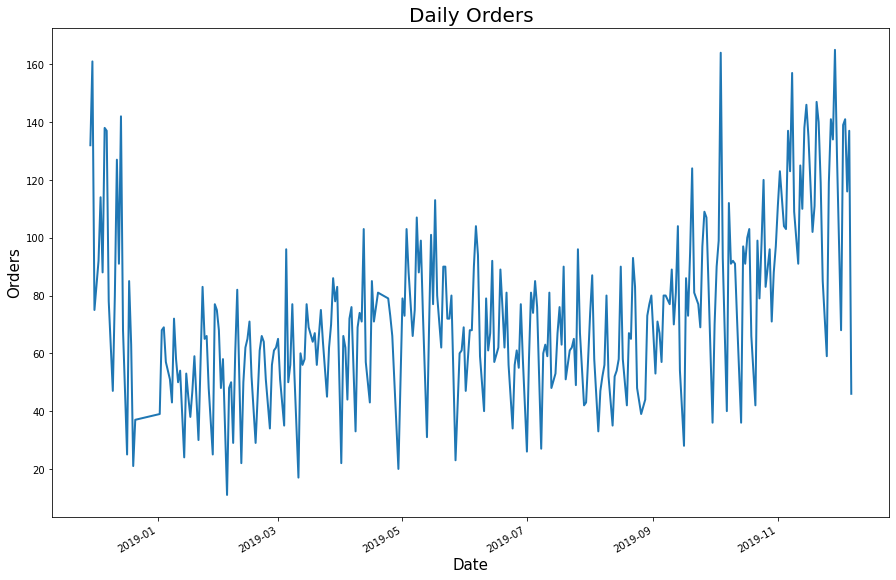

In [203]:
# visualize daily orders
dailymetrics['DailyOrders'].plot(kind='line', linewidth=2, figsize=(15,10))
plt.title('Daily Orders', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Orders', fontsize = 15)

Text(0, 0.5, 'Customers')

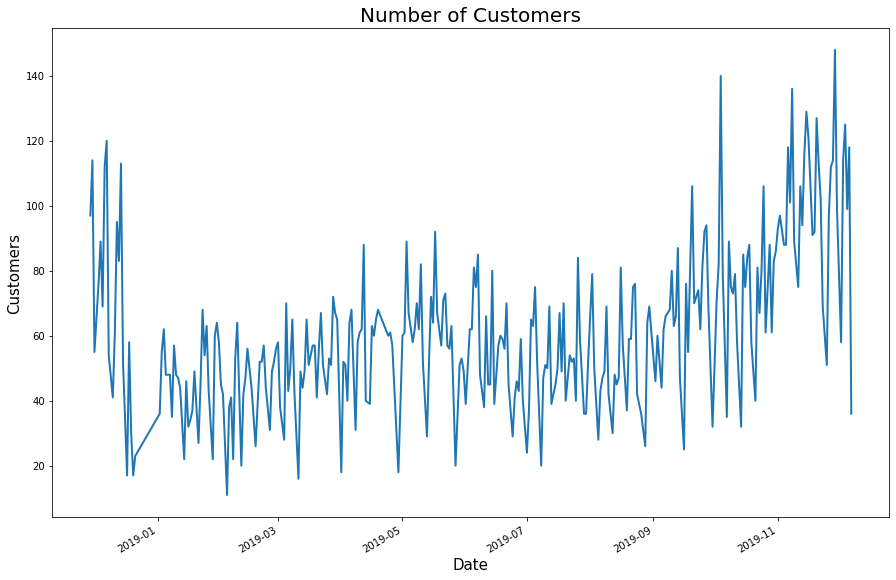

In [204]:
# visualize number of customers daily
dailymetrics['NumCustomers'].plot(kind='line', linewidth=2, figsize=(15,10))
plt.title('Number of Customers', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Customers', fontsize = 15)

Text(0, 0.5, 'Sales')

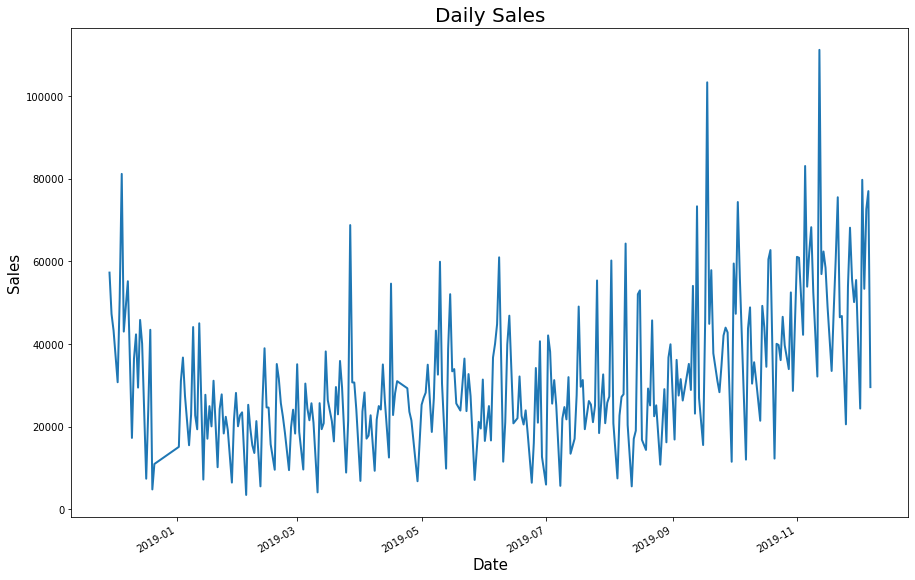

In [205]:
# visualize daily sales
dailymetrics['DailySales'].plot(kind='line', linewidth=2, figsize=(15,10))
plt.title('Daily Sales', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

<a id='returns'></a>
## Analysis on Returned Items
**Business Questions:**
- 1. Which products have the highest amount of returns?
- 1. Which products have the largest number of returns?
- 2. What are the most frequently returned products?
- 3. Who are the customers with highest amount of returns?
- 4. Who are the customers with largest number of returns?
- 5. Who are the customers most frequently returning products?
- 6. Which months have the higest amount of returns?

In [206]:
# create a copy from original df where cancellations are still intact
df2 = df.copy()

In [207]:
# delete records where StockCode is AMAZONFEE, BANK CHARGES, C2, CRUK, D, DOT, M, PADS, POST, S, m
alpha_r = ['AMAZONFEE', 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST', 'S', 'm']
df2 = df2[~df2['StockCode'].isin(alpha_r)]

In [208]:
# delete records where UnitPrice is 0
df2 = df2[df2['UnitPrice'] != 0]

In [209]:
# extract transaction period and create a new column
df2['TransactionPeriod'] = df2['InvoiceDate'].dt.to_period('M')

In [210]:
# add Total_Sales column
df2['TotalSales'] = df2['Quantity'] * df2['UnitPrice']

In [211]:
# create a dataframe for returns
df_returns = df2[df2['Quantity'] < 0]

In [212]:
df_returns.to_csv('df_returns.csv', index=False)

In [213]:
df_returns.groupby(['Description'])['Quantity'].sum().sort_values()

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
PINK BLUE FELT CRAFT TRINKET BOX       -2617
WHITE HANGING HEART T-LIGHT HOLDER     -2578
GIN + TONIC DIET METAL SIGN            -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1447
TEA TIME PARTY BUNTING                 -1424
PAPER POCKET TRAVELING FAN             -1385
WORLD WAR 2 GLIDERS ASSTD DESIGNS      -1200
COLOUR GLASS. STAR T-LIGHT HOLDER      -1174
JUMBO BAG RED RETROSPOT                -1115
HOME SWEET HOME MUG                    -1052
PANTRY CHOPPING BOARD                   -946
PLACE SETTING WHITE HEART               -890
FELTCRAFT BUTTERFLY HEARTS              -877
REGENCY CAKESTAND 3 TIER                -857
ASSORTED COLOURS SILK FAN               -744
JUMBO BAG APPLES                        -723
MIRROR MOSAIC T-LIGHT HOLDER            -72

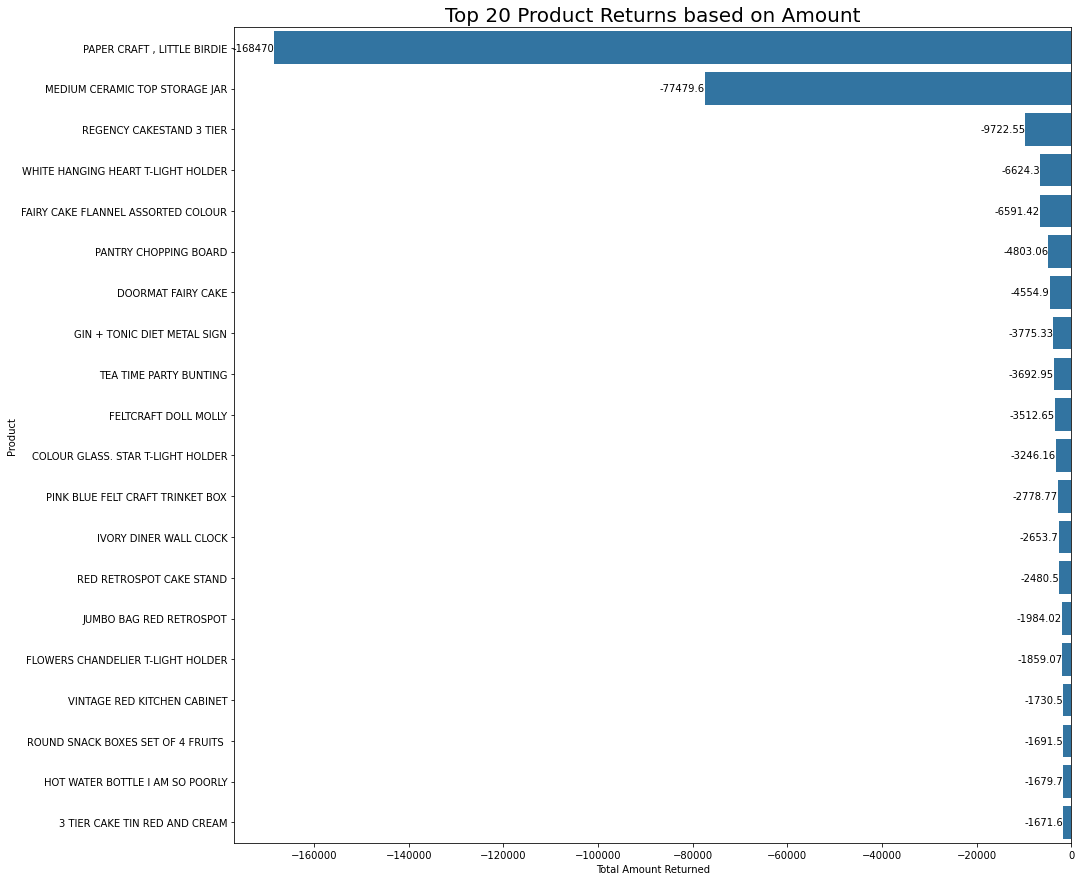

In [214]:
# top 20 product returns by amount
top20_returns_sales = df_returns.groupby(['Description'])['TotalSales'].agg('sum').sort_values()[:20]

plt.figure(figsize = [15, 15])
base_color = sb.color_palette()[0]

g = sb.barplot(x = top20_returns_sales.values, y = top20_returns_sales.index, color=base_color)
plt.title("Top 20 Product Returns based on Amount", size=20)
plt.xlabel("Total Amount Returned", size=10)
plt.ylabel("Product", size=10)
g.bar_label(g.containers[0])
plt.show();

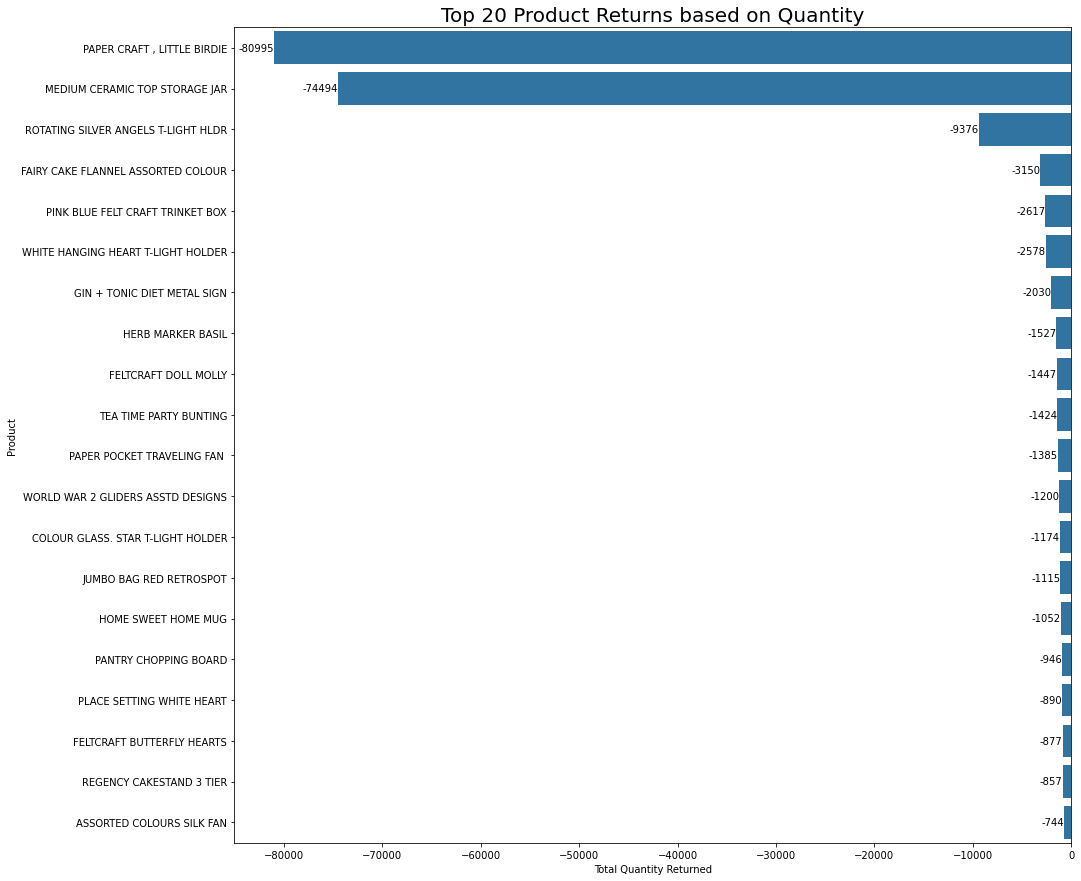

In [215]:
# top 20 product returns by quantity
top20_returns = df_returns.groupby(['Description'])['Quantity'].agg('sum').sort_values()[:20]

plt.figure(figsize = [15, 15])
base_color = sb.color_palette()[0]

g = sb.barplot(x = top20_returns.values, y = top20_returns.index, color=base_color)
plt.title("Top 20 Product Returns based on Quantity", size=20)
plt.xlabel("Total Quantity Returned", size=10)
plt.ylabel("Product", size=10)
g.bar_label(g.containers[0])
plt.show();

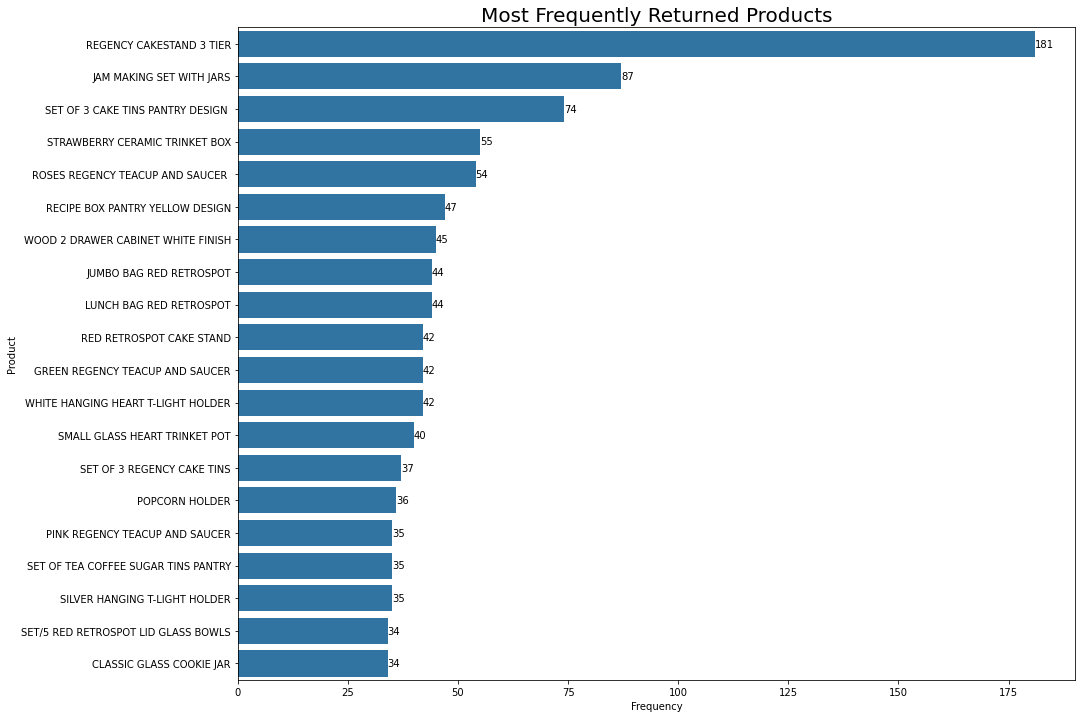

In [216]:
# most frequently returned products
plt.figure(figsize = [15, 12])
base_color = sb.color_palette()[0]

g = sb.barplot(x=df_returns['Description'].value_counts().values[:20], y=df_returns['Description'].value_counts().index[:20], color = base_color)
plt.title("Most Frequently Returned Products", size=20)
plt.xlabel("Frequency", size=10)
plt.ylabel("Product", size=10)
g.bar_label(g.containers[0])
plt.show();

In [217]:
df_returns['Description'].value_counts()

REGENCY CAKESTAND 3 TIER               181
JAM MAKING SET WITH JARS                87
SET OF 3 CAKE TINS PANTRY DESIGN        74
STRAWBERRY CERAMIC TRINKET BOX          55
ROSES REGENCY TEACUP AND SAUCER         54
RECIPE BOX PANTRY YELLOW DESIGN         47
WOOD 2 DRAWER CABINET WHITE FINISH      45
JUMBO BAG RED RETROSPOT                 44
LUNCH BAG RED RETROSPOT                 44
RED RETROSPOT CAKE STAND                42
GREEN REGENCY TEACUP AND SAUCER         42
WHITE HANGING HEART T-LIGHT HOLDER      42
SMALL GLASS HEART TRINKET POT           40
SET OF 3 REGENCY CAKE TINS              37
POPCORN HOLDER                          36
PINK REGENCY TEACUP AND SAUCER          35
SET OF TEA COFFEE SUGAR TINS PANTRY     35
SILVER HANGING T-LIGHT HOLDER           35
SET/5 RED RETROSPOT LID GLASS BOWLS     34
CLASSIC GLASS COOKIE JAR                34
ALARM CLOCK BAKELIKE RED                33
NATURAL SLATE CHALKBOARD LARGE          32
BREAD BIN DINER STYLE IVORY             31
HANGING HEA

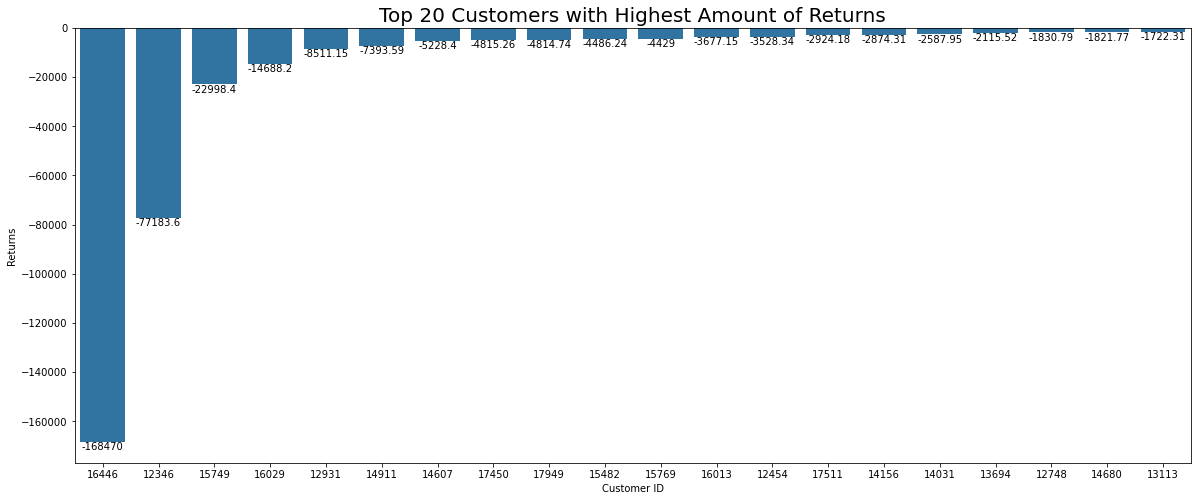

In [218]:
# Top 20 customers with highest amount of returns
cust_ret_sales = df_returns.groupby(['CustomerID'])['TotalSales'].agg('sum').sort_values()[:20]

plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

g = sb.barplot(x = cust_ret_sales.index, y = cust_ret_sales.values, color=base_color)
plt.title("Top 20 Customers with Highest Amount of Returns", size=20)
plt.xlabel("Customer ID", size=10)
plt.ylabel("Returns", size=10)
g.bar_label(g.containers[0])
plt.show();

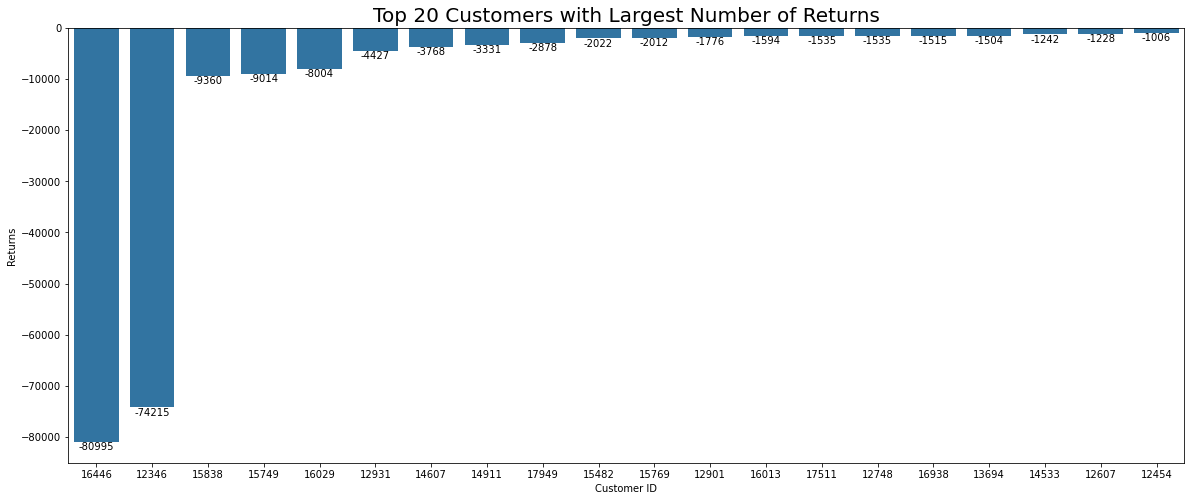

In [219]:
# Top 20 customers with largest number of returns
cust_ret_qty = df_returns.groupby(['CustomerID'])['Quantity'].agg('sum').sort_values()[:20]

plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

g = sb.barplot(x = cust_ret_qty.index, y = cust_ret_qty.values, color=base_color)
plt.title("Top 20 Customers with Largest Number of Returns", size=20)
plt.xlabel("Customer ID", size=10)
plt.ylabel("Returns", size=10)
g.bar_label(g.containers[0])
plt.show();

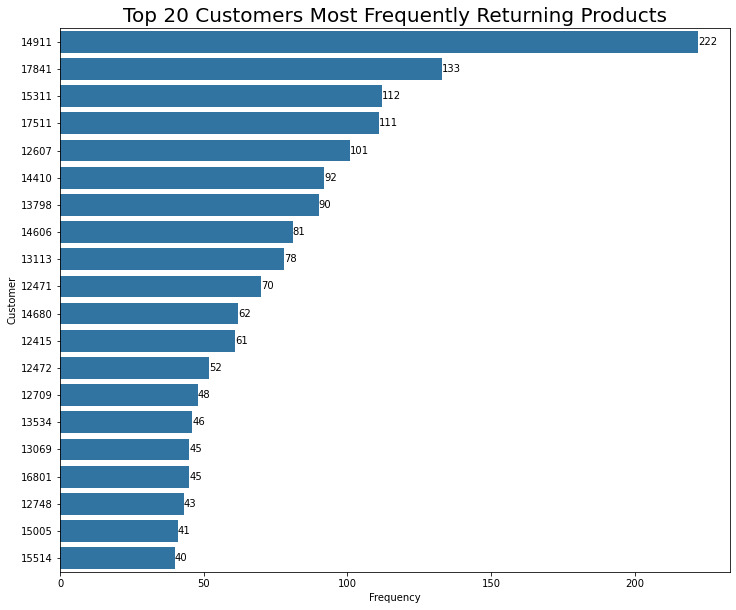

In [220]:
# Customer most frequently returning products 
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[0]

g = sb.barplot(x=df_returns['CustomerID'].value_counts().values[:20], y=df_returns['CustomerID'].value_counts().index[:20], color = base_color)
plt.title("Top 20 Customers Most Frequently Returning Products", size=20)
plt.xlabel("Frequency", size=10)
plt.ylabel("Customer", size=10)
g.bar_label(g.containers[0])
plt.show();

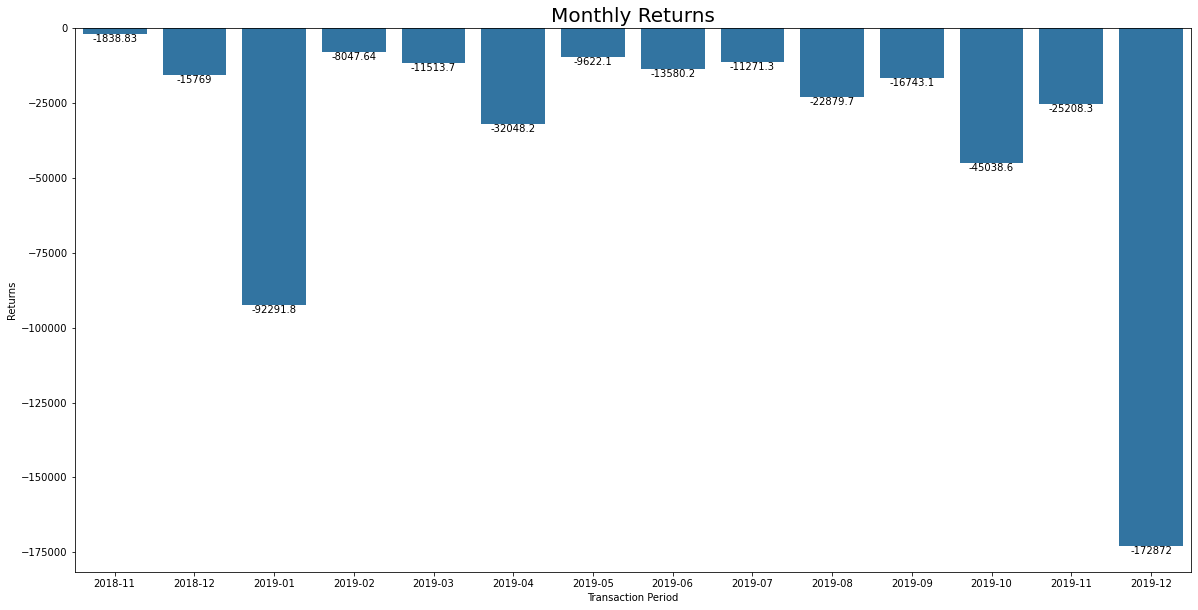

In [221]:
# Total Returns per Month
monthly_returns = df_returns.groupby(['TransactionPeriod'])['TotalSales'].agg('sum')

plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

g = sb.barplot(x = monthly_returns.index, y = monthly_returns.values, color=base_color)
plt.title("Monthly Returns", size=20)
plt.xlabel("Transaction Period", size=10)
plt.ylabel("Returns", size=10)
g.bar_label(g.containers[0])
plt.show();

> - **1. Which products have the highest amount of returns?**
> - PAPER CRAFT, LITTLE BIRDIE has the highest amount of returns.<br><br>
>
> - **2. Which products have the largest number of returns?**
> - Likewise, PAPER CRAFT, LITTLE BIRDIE has the largest number of returns.<br><br>
>
> - **3. What are the most frequently returned products?**
> - While REGENCY CAKESTAND 3 TIER is the top performing product in terms of total sales, it is also the most frequently returned product. It was returned 181 times throughout the year.<br><br>
>
> - **4. Who are the customers with highest amount of returns?**
> - Customer ID 16446 is our customer who has the highest amount product returns.<br><br>
>
> - **5. Who are the customers with largest number of returns?**
> - Customer ID 16446 is also our customer who has the largest number of product returns.<br><br>
>
> - **6. Who are the customers most frequently returning products?**
> - CustomerID 14911 is the top customer who has frequently returned products. This customer has returned 222 times.<br><br>
>
> - **7. Which months have the higest amount of returns?**
> - Surprisingly, the period 12-2019 has the higest amount of returns considering that this period has only 7 days.